# This notebook will serve for the initial EDA for the ratings data for the TFW project

In [45]:
# Import necassary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

ROOT = os.environ.get('PWD')

In [52]:
# read in the dataset

df_rating = pd.read_csv('../data/rating_20210713.csv')

In [ ]:
# convert rating_date, date_from and data_to to datetime 

df_rating['rating_date'] = pd.to_datetime(df_rating['rating_date'])
df_rating['date_from'] = pd.to_datetime(df_rating['date_from'], errors = 'coerce')
df_rating['date_to'] = pd.to_datetime(df_rating['date_to'], errors = 'coerce')

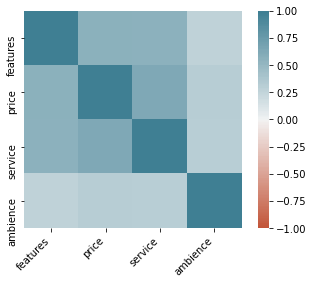

In [47]:
# generate the heatmap

corr = df_rating.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [8]:
corr.style.background_gradient(cmap='coolwarm')

,features,price,service,ambience
features,1.000000,0.618268,0.581604,0.298260
price,0.618268,1.000000,0.671694,0.359136
service,0.581604,0.671694,1.000000,0.351328
ambience,0.298260,0.359136,0.351328,1.000000


# there are high correlations for many of these variables, but in this case, this should not be surprising

In [53]:
df_rating.nunique()

rating_date     4810
listing_id     21033
features           5
price              5
service            5
ambience           5
date_from       3976
date_to         3936
dtype: int64

In [9]:
df_rating.head()


,rating_date,listing_id,features,price,service,ambience,date_from,date_to
0,2012-09-16,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2012-09-09,2012-09-15
1,2012-10-20,fbd74bce-23dd-53e7-b988-8beb85160d6f,4,5,5,5,2012-10-06,2012-10-13
2,2014-06-17,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2013-08-31,2013-09-07
3,2014-10-15,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,4,2014-10-09,2014-10-12
4,2015-08-19,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,5,2015-08-10,2015-08-17


In [36]:
# convert rating_date, date_from and data_to to datetime 

df_rating['rating_date'] = pd.to_datetime(df_rating['rating_date'])


In [12]:
df_rating.head()


,rating_date,listing_id,features,price,service,ambience,date_from,date_to
0,2012-09-16,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2012-09-09,2012-09-15
1,2012-10-20,fbd74bce-23dd-53e7-b988-8beb85160d6f,4,5,5,5,2012-10-06,2012-10-13
2,2014-06-17,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2013-08-31,2013-09-07
3,2014-10-15,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,4,2014-10-09,2014-10-12
4,2015-08-19,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,5,2015-08-10,2015-08-17


In [14]:
print (df_rating.dtypes)

rating_date    datetime64[ns]
listing_id             object
features                int64
price                   int64
service                 int64
ambience                int64
date_from              object
date_to                object
dtype: object


In [54]:
df_rating['date_to'] = pd.to_datetime(df_rating['date_to'], errors = 'coerce')

In [55]:
df_rating['date_from'] = pd.to_datetime(df_rating['date_from'], errors = 'coerce')

In [17]:
print (df_rating.dtypes)

rating_date    datetime64[ns]
listing_id             object
features                int64
price                   int64
service                 int64
ambience                int64
date_from      datetime64[ns]
date_to        datetime64[ns]
dtype: object


# we want to try two different ways of thinking about ratings. The first is to create a rated or not category, and see if this helps us think about whether just having a rating can make a property more attractive. The second is to follow the impulse that a postive or negative rating--defined as having an average rating above or below 2.5 for all categories--has a differential impact on attractiveness (which might be expressed in more views, more inquiries, higher price)

# 1) introduce a variable to indicate whether a property has a rating, this will be 0 for those properties we add in later

In [39]:
df_rating = df_rating.assign(rated=1)

In [40]:
# get the master list of all properties. read in listings dataset

df_listings = pd.read_csv('../data/listings_20210707.csv')



In [42]:
df_listings.nunique()

listing_id                        30269
customer_id                       19835
state                                 3
contract_end                         78
zip                                 302
country_title                         1
region                               29
subregion                           196
holiday_region                       29
property_type                        25
subscription                          2
binding_inquiry                       2
option_allergic                       4
option_non_smoking_only               4
option_holiday_with_your_pet          4
option_holiday_with_your_horse        4
option_holiday_with_your_dog          4
option_close_to_the_beach             3
option_railway_station                2
option_airport                        2
option_wheelchair_accessible          3
option_family_travel                  4
option_close_to_the_water             3
option_holiday_with_your_baby         4
option_long_term_holiday              4


In [21]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30269 entries, 0 to 30268
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      30269 non-null  object 
 1   customer_id                     30269 non-null  object 
 2   state                           30269 non-null  object 
 3   contract_end                    30269 non-null  object 
 4   zip                             30269 non-null  object 
 5   country_title                   30269 non-null  object 
 6   region                          30269 non-null  object 
 7   subregion                       30268 non-null  object 
 8   holiday_region                  30269 non-null  object 
 9   property_type                   30269 non-null  object 
 10  subscription                    30269 non-null  object 
 11  binding_inquiry                 30269 non-null  object 
 12  option_allergic                 

In [24]:
df_properties = df_listings['listing_id']

In [25]:
df_properties.tail()


30264    00779d9d-7264-5704-a71d-e6d1849cb4b7
30265    fd0c87bc-54f5-5281-90e8-93c3e4ac40b0
30266    9e99c378-45e5-5635-8644-e3f13cf6d101
30267    048f8764-c789-5003-9a67-a63d3d3f5062
30268    713131b6-8f3d-50c9-b0cb-0ba0f985e06a
Name: listing_id, dtype: object

In [46]:
df_rating_all_properties = pd.merge(df_properties, df_rating, left_on='listing_id', right_on='listing_id', how='left')

In [47]:
df_rating_all_properties.nunique()

listing_id     30269
rating_date     4804
features           5
price              5
service            5
ambience           5
date_from       3963
date_to         3927
rated              1
dtype: int64

In [48]:
# set missing values to zero

df_rating_all_properties['rated'] = df_rating_all_properties['rated'].fillna(0)

In [49]:
# check to see that there are two possible values in the rated/not reated category 

df_rating_all_properties['rated'].unique()

array([1., 0.])

# now generate average ratings for each property. proceed by first generating averages per stay, then for all ratings for each property

In [50]:
df_rating_all_properties['average_rating'] = df_rating_all_properties[['features', 'price', 'service', 'ambience']].mean(axis=1)

In [51]:
df_rating_all_properties.head()

,listing_id,rating_date,features,price,service,ambience,date_from,date_to,rated,average_rating
0,97232bc1-cee6-54cc-9965-be13177051d3,2010-05-19,5.0,5.0,5.0,5.0,NaT,NaT,1.0,5.0
1,97232bc1-cee6-54cc-9965-be13177051d3,2010-05-19,5.0,5.0,5.0,5.0,NaT,NaT,1.0,5.0
2,97232bc1-cee6-54cc-9965-be13177051d3,2010-05-19,5.0,5.0,5.0,5.0,NaT,NaT,1.0,5.0
3,97232bc1-cee6-54cc-9965-be13177051d3,2010-05-19,5.0,5.0,5.0,5.0,NaT,NaT,1.0,5.0
4,97232bc1-cee6-54cc-9965-be13177051d3,2010-05-19,5.0,5.0,5.0,5.0,NaT,NaT,1.0,5.0


In [52]:
# now generate average ratings by listing id
df_rating_all_properties.groupby("listing_id", as_index=True)[['average_rating']].mean()

,average_rating
listing_id,
00005de7-6ed8-541b-be83-2573a46cd307,NaN
0002653c-7e59-59a2-89f2-f6574ba14a0a,NaN
0003f153-450a-5837-8a46-bd5db5b536b1,4.986111
00058d0d-579c-5b84-814b-8920fb5f1a27,5.000000
000cd267-f826-50f4-aa55-cec9aaa079ae,5.000000
...,...
ffedb526-cde3-54d6-9db9-f865ed0a0f13,4.875000
fff6b775-e07f-578e-b4f6-a792426ce3aa,4.880952
fffed690-31dd-5409-bc1e-81121ec35345,NaN


In [53]:
df_rating_all_properties.nunique()

listing_id        30269
rating_date        4804
features              5
price                 5
service               5
ambience              5
date_from          3963
date_to            3927
rated                 2
average_rating       17
dtype: int64

In [54]:
# set missing values to zero

df_rating_all_properties['average_rating'] = df_rating_all_properties['average_rating'].fillna(0)

In [57]:
df_rating_all_properties['average_rating'].unique()

array([5.  , 4.75, 4.  , 0.  , 4.5 , 4.25, 3.  , 3.5 , 1.5 , 2.  , 2.25,
       3.75, 3.25, 2.75, 1.75, 2.5 , 1.  , 1.25])

In [60]:
df_rating_all_properties['average_rating'].value_counts()

5.00    158985
4.75     15131
0.00      9261
4.50      5179
4.25      1579
4.00      1167
3.75       302
3.50       218
3.00       147
3.25       124
2.50        98
2.00        94
2.75        87
2.25        77
1.75        62
1.50        44
1.00        26
1.25        15
Name: average_rating, dtype: int64

# test to see how long stays tend to be in our ratings data

In [66]:
df_rating['length_of_stay'] = (df_rating.date_to - df_rating.date_from).dt.days


In [67]:
df_stay = df_rating['length_of_stay'].mean()
df_stay

7.534252304305957

In [68]:
df_rating['month_year'] = df_rating['rating_date'].dt.to_period('M')

NameError: name 'df' is not defined

In [65]:
df_rating['rating_date'].resample('D').count()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [30]:
xxx

rating_date  rating_date
2002         8                 1
2003         8                 1
             9                 1
             10                1
2005         7                 1
                            ... 
2021         3               213
             4               200
             5              1141
             6              4082
             7               838
Name: rating_date, Length: 196, dtype: int64

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

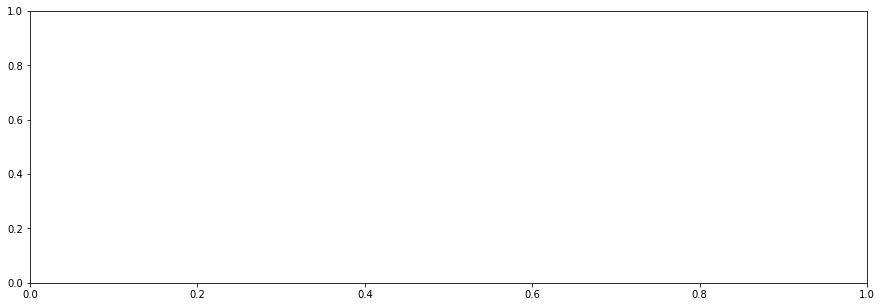

In [58]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=df_rating, x=df_rating['date_from'], y=df_rating['date_from'].resample('M').mean())

In [ ]:
sns.displot(df_rating['length_of_stay'])